

Data Read Done!
Training X Size : (134384, 7)
Training Y Size : (134384,)
Test X Size : (33596, 7)
Test Y Size : (33596,)




************ TRAINING START ************ 
Epoch 1/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0027 - mae: 0.0373 - val_loss: 0.0013 - val_mae: 0.0265
Epoch 2/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0014 - mae: 0.0278 - val_loss: 0.0014 - val_mae: 0.0286
Epoch 3/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0014 - mae: 0.0274 - val_loss: 0.0013 - val_mae: 0.0266
Epoch 4/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0013 - mae: 0.0269 - val_loss: 0.0014 - val_mae: 0.0280
Epoch 5/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0013 - mae: 0.0267 - val_loss: 0.0012 - val_mae: 0.0257
Epoch 6/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0013 - mae: 0.0266 - val_loss: 0.0012 - val_mae: 0.0261
Epoch 7/50
4200/4200 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0013 - mae: 0.0264 - val_loss: 0.0013 - val_m

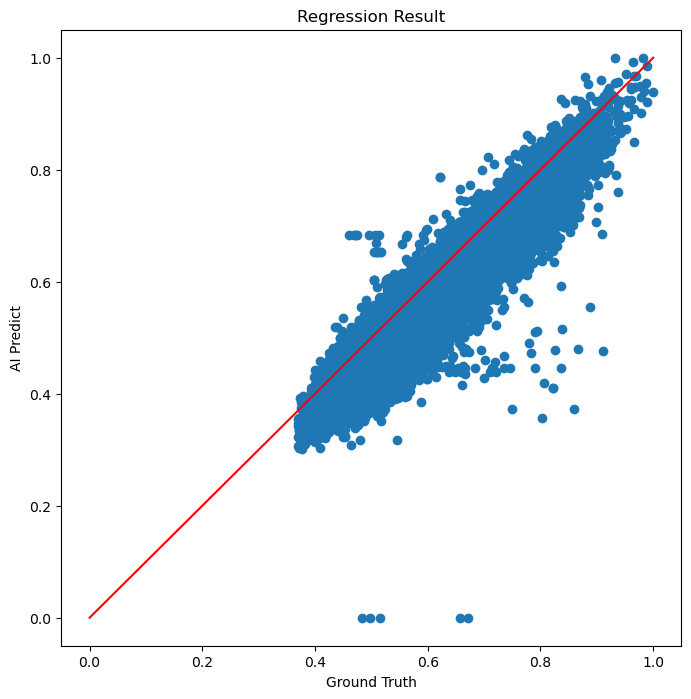

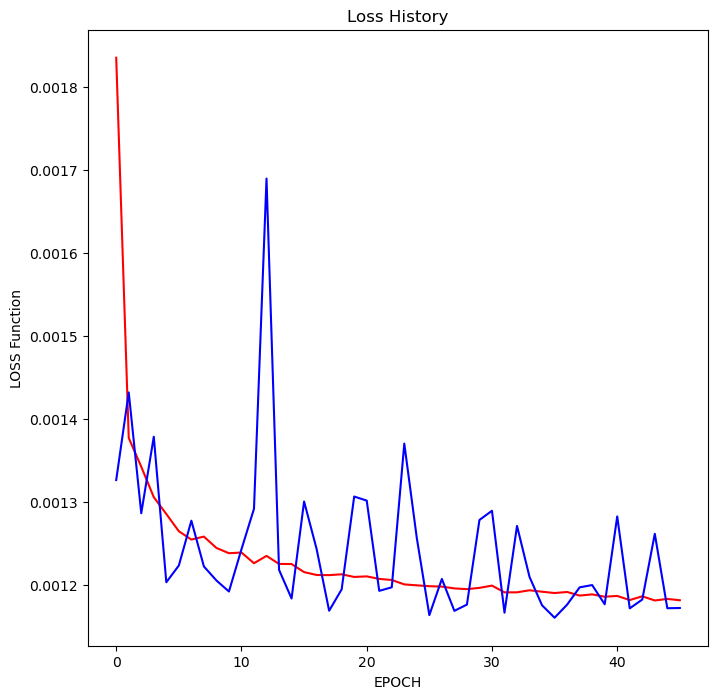

In [12]:
from tensorflow import keras
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
import random
import matplotlib.pyplot as plt

# 데이터를 떠먹여 줄 클래스를 제작합니다.
class DataReader():
    def __init__(self):
        self.train_X, self.train_Y, self.test_X, self.test_Y = self.read_data()

        # 데이터 읽기가 완료되었습니다.
        # 읽어온 데이터의 정보를 출력합니다.
        print("\n\nData Read Done!")
        print("Training X Size : " + str(self.train_X.shape))
        print("Training Y Size : " + str(self.train_Y.shape))
        print("Test X Size : " + str(self.test_X.shape))
        print("Test Y Size : " + str(self.test_Y.shape) + '\n\n')

    def read_data(self):
        file = open("pysicalinfo.csv",encoding="euc-kr")
        data = []
        file.readline()
        for line in file:
            splt = line.split(",")
            chest = process(splt[2])
            arm = process(splt[3])
            height = process(splt[4])
            waist = process(splt[5])
            sat = process(splt[6])
            head = process(splt[7])
            feet = process(splt[8])
            weight = process(splt[9])

            data.append((chest, arm, height, waist, sat, head, feet, weight))


        random.shuffle(data)
        data = np.asarray(data)

        normalized_data = data / np.max(data, axis=0)

        x, y = normalized_data.shape

        train_X = normalized_data[:int(x * 0.8), :-1]
        train_Y = normalized_data[:int(x * 0.8), -1]
        test_X = normalized_data[int(x * 0.8):, :-1]
        test_Y = normalized_data[int(x * 0.8):, -1]

        file.close()

        return train_X, train_Y, test_X, test_Y


def process(txt):
    if "(" in txt:
        txt = txt.split("(")[0]
    txt = txt.strip()
    return float(txt)


def draw_graph(prediction, label, history):
    X = prediction / np.max(prediction, axis=0)
    Y = label / np.max(label, axis=0)

    minval = min(np.min(X), np.min(Y))
    maxval = max(np.max(X), np.max(Y))

    fig = plt.figure(figsize=(8, 8))
    plt.title("Regression Result")
    plt.xlabel("Ground Truth")
    plt.ylabel("AI Predict")
    plt.scatter(X, Y)
    plt.plot([minval, maxval], [minval, maxval], "red")
    fig.savefig("result.png")

    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")

# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 50  # 예제 기본값은 50입니다.

# 데이터를 읽어옵니다.
dr = DataReader()

# 인공신경망을 제작합니다.
model = keras.Sequential([
    keras.layers.Dense(7),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(1, activation='sigmoid')
])

# 인공신경망을 컴파일합니다.
model.compile(optimizer="adam", loss="mse", metrics=['mae'])

# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y),
                    callbacks=[early_stop])

# 학습 결과를 그래프로 출력합니다.
draw_graph(model(dr.test_X), dr.test_Y, history)